<h1>NEURAL NETWORK MODEL</h1>

Start point of this project is PhD thesis of Zoran Jankovic.<br>
I saw architecture in paper and this is my start point.<br>
But in my case this architecture not working correctly.<br>
I start build my network from zero,step by step.<br>

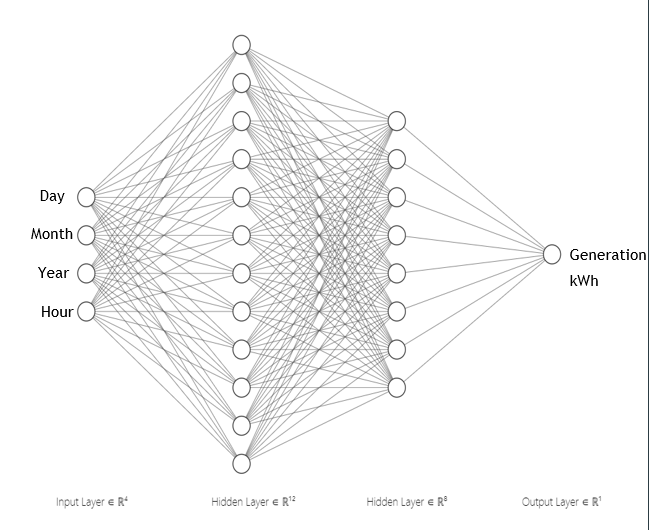

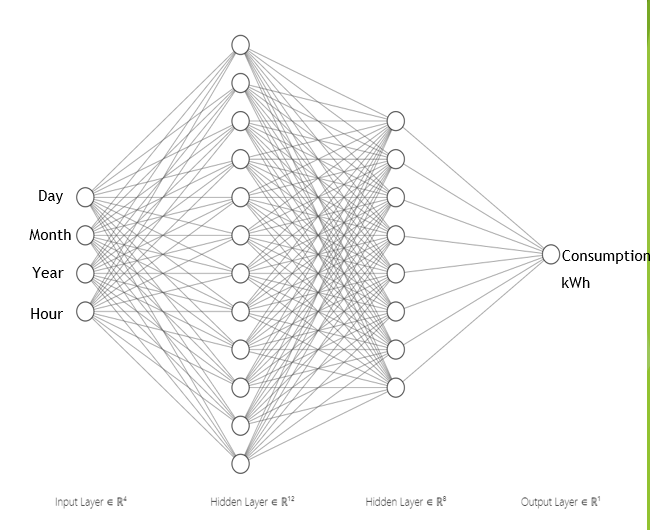

In [3]:
from IPython.display import Image, display
display(Image(filename='ElectricityGeneration.png'))
display(Image(filename='ElectricityConsumption.png'))

This is final product 2 separated models one is for consumption and other one is for generation.<br>
Both models has close to 7% <b>MAPE</b> and <b>MSE</b> error.<br>


In [4]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential(
    [               
        tf.keras.Input(shape=(4,)),
        Dense(12, activation="relu", name="Layer01"),
        Dense(8, activation="relu", name="Layer02"),
        Dense(1, name="OutputLayer",activation='linear') 
    ], name="my_model"
)

We have 2 same models input is explained on photo and we have 2 hidden layers.
<li>First hidden layer has 12 neurons with relu activation function.</li>
<li>Second hidden layer has 8 with same activation function.</li>
<li>Final output has linear activation function <b>THIS IS BIG DIFFERENCE</b> between my model and model of professor Zoran.</li>

In [5]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse', tf.keras.metrics.MeanAbsolutePercentageError()])

In this article I'm not going into deep theory becouse this will be explained in my BSc.<br>
There is only stated what is architecture in general.<br>


<b>KEY CONCEPTS:</b><br>
<li><b>Optimizator:</b>Adam with learning rate 0.01</li>
<li><b>Activation functions:</b>ReLu and Linear</li>
<li><b>Batch size:</b> 24 <b>DIFFERENCE</b></li>
<li><b>Number of epochs:</b> 30 <b>DIFFERENCE</b></li>
<li><b>Loss function:</b>MSE</li>
<li><b>Metrics:</b>MSE and MAPE</li>

In my case number of epochs is 30 but in PhD of professor is 269.<br>
My model is tiny deep but training process is very simple.<br>
Batch size is 24 why?This is logical appoarch to the problem.When I do training I ask myself is it better to train model if I put data for whole day in neural network.<br>
What this mean?<br>
In professor PhD batch size is 1.But I ask myself what will be if I put data for 24 hours in my network => one epoch of training with data for whole day.<br>
This improve my model rapidly.

After evaluation I save my model in json(Neural network architecture) and weights of my model in .h5 file.<br>

Example of prediction for "normal day"<br>

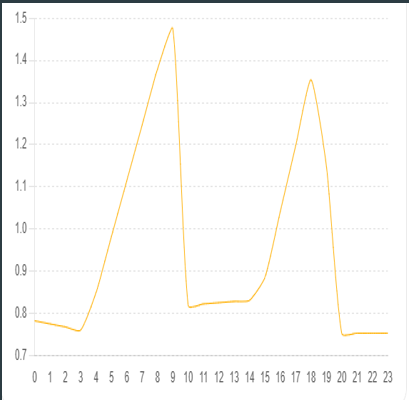

In [6]:
display(Image(filename='predictionConsumptionNormalDay.png'))

Example of prediction for edge case day.This is mean energy consumption of this day is not normal like on first sample.<br>

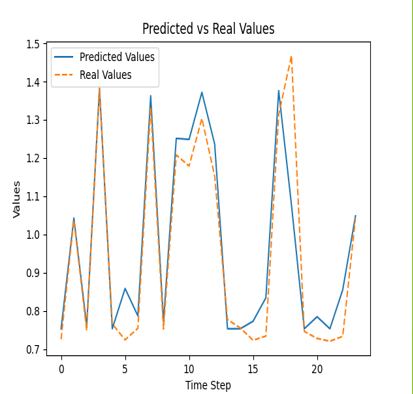

In [7]:
display(Image(filename='predictionConsumptionEdgeCase.png'))

Example of prediction for energy generation.<br>

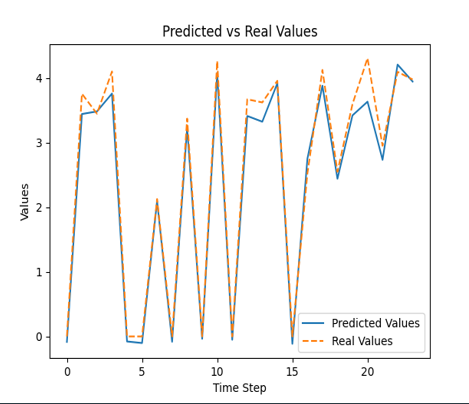

In [8]:
display(Image(filename='predictionGeneration.png'))